Downloading...
From: https://drive.google.com/uc?id=1w0r-55d_zSeIpxxBbjGZmw-DjnEvQ0NI
To: /content/dataset.csv
100%|██████████| 37.0k/37.0k [00:00<00:00, 47.5MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None
          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000 

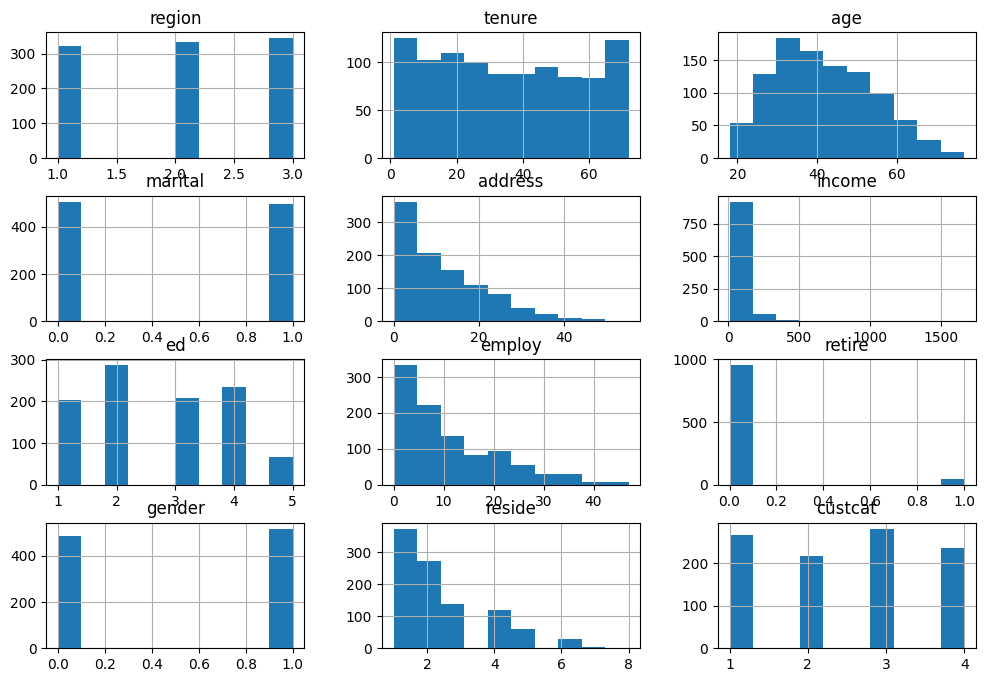

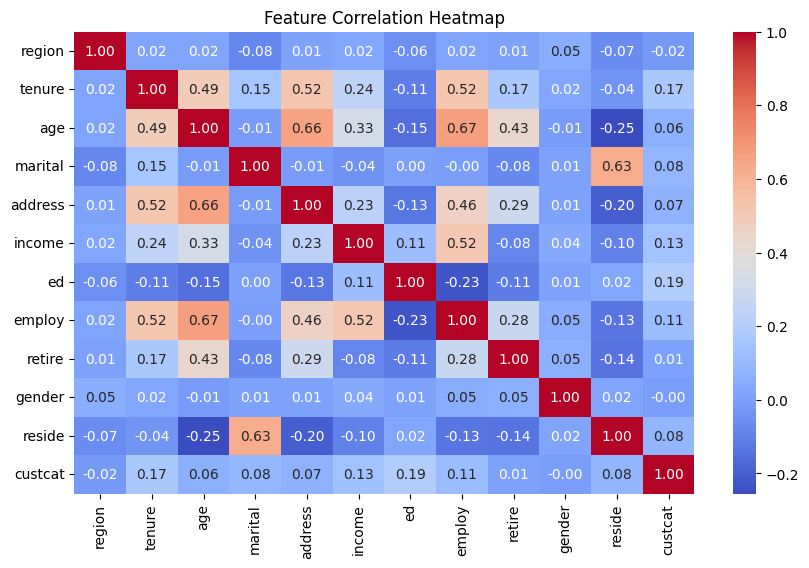

In [7]:
# Install required libraries
!pip install gdown

# Import libraries
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l2
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
# Download dataset from Google Drive
url = 'https://drive.google.com/uc?id=1w0r-55d_zSeIpxxBbjGZmw-DjnEvQ0NI'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

# Load dataset
df = pd.read_csv(output)

# Display dataset info
print(df.info())
print(df.describe())

# Plot histograms for feature analysis
df.hist(figsize=(12, 8))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Splitting dataset into features and target
X = df.drop(columns=['custcat'])  # Replace 'target_column' with the actual column name
y = df['custcat']  # Target column

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=73)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=73)





<Axes: xlabel='tenure', ylabel='Count'>

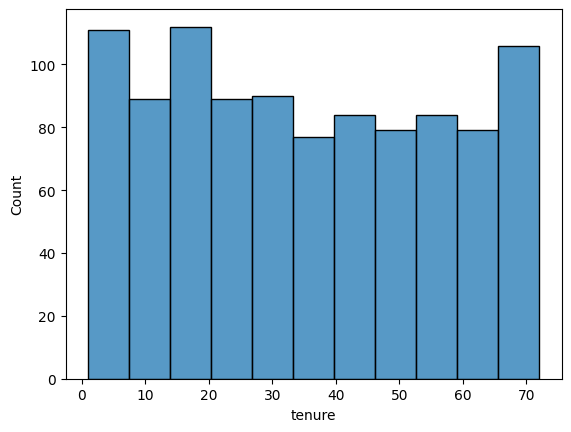

In [5]:
sns.histplot(df['tenure'])


<Axes: xlabel='ed', ylabel='Count'>

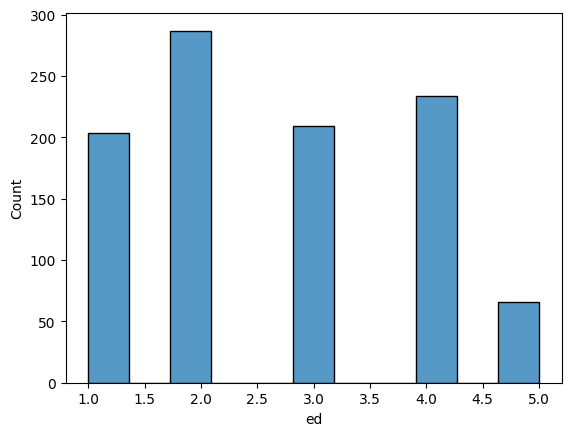

In [6]:
sns.histplot(df['ed'])

In [8]:

target = df['custcat']
features = df.drop(columns=['custcat'])

# Step 1: Split the dataset into training and temp datasets
train_data, temp_data, train_labels, temp_labels = train_test_split(
    features, target, test_size=0.3, random_state=42
)

# Split temp data into validation and test sets
validation_data, test_data, validation_labels, test_labels = train_test_split(
    temp_data, temp_labels, test_size=0.5, random_state=42
)

# Step 2: Normalize the features using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
train_data_scaled = scaler.fit_transform(train_data)

# Transform validation and test data with the same scaler
validation_data_scaled = scaler.transform(validation_data)
test_data_scaled = scaler.transform(test_data)

In [9]:
y_train = to_categorical(train_labels-1, num_classes=4)
y_val = to_categorical(validation_labels-1, num_classes=4)
y_test = to_categorical(test_labels-1, num_classes=4)

In [13]:

def create_model(layers=1, neurons=32, optimizer='sgd', use_batchnorm=False, dropout_rate=0.0):
    model = Sequential()

    # Input layer and first hidden layer
    model.add(Dense(neurons, activation='relu', input_shape=(train_data_scaled.shape[1],)))
    if use_batchnorm:
        model.add(BatchNormalization())
    if dropout_rate > 0.0:
        model.add(Dropout(dropout_rate))

    # Additional hidden layer if layers=2
    if layers == 2:
        model.add(Dense(neurons, activation='relu'))
        if use_batchnorm:
            model.add(BatchNormalization())
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(4, activation='softmax'))


    # Compile the model with SGD optimizer
    if optimizer == 'sgd':
        opt = SGD(learning_rate=0.01)  # Using SGD optimizer
    else:
        raise ValueError("Unsupported optimizer")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy for multi-class
    return model



In [11]:
neurons_list = [10, 30, 70]
results = []

for neurons in neurons_list:
    print(f"\nTraining model with {neurons} neurons...")

    model1 = create_model(layers=1, neurons=neurons, use_batchnorm=True, dropout_rate=0.0, optimizer='sgd')
    model1.fit(train_data_scaled, y_train, validation_data=(validation_data_scaled, y_val), epochs=10, batch_size=32, verbose=1)

    model2 = create_model(layers=2, neurons=neurons, use_batchnorm=True, dropout_rate=0.0, optimizer='sgd')
    model2.fit(train_data_scaled, y_train, validation_data=(validation_data_scaled
    , y_val), epochs=10, batch_size=32, verbose=1)


    loss_1, accuracy_1 = model1.evaluate(test_data_scaled, y_test, verbose=0)
    print(f"Accuracy for model1 with {neurons} neurons: {accuracy_1:.4f}")

    loss_2, accuracy_2 = model2.evaluate(test_data_scaled, y_test, verbose=0)
    print(f"Accuracy for model2 with {neurons} neurons: {accuracy_2:.4f}")

    results.append({
        "Neurons": neurons,
        "Model 1 Accuracy": accuracy_1,
        "Model 2 Accuracy": accuracy_2
    })


print("\nComparison of results:")
for result in results:
    print(f"Model with {result['Neurons']} neurons - Accuracy: {result['Model 1 Accuracy']:.4f}, Model 2 Accuracy: {result['Model 2 Accuracy']:.4f}")



Training model with 10 neurons...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2417 - loss: 1.8025 - val_accuracy: 0.2467 - val_loss: 1.4134
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2327 - loss: 1.6219 - val_accuracy: 0.2400 - val_loss: 1.4043
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2923 - loss: 1.4974 - val_accuracy: 0.2333 - val_loss: 1.4018
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2458 - loss: 1.4888 - val_accuracy: 0.2333 - val_loss: 1.4019
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3149 - loss: 1.4240 - val_accuracy: 0.2267 - val_loss: 1.4030
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3026 - loss: 1.4157 - val_accuracy: 0.2267 - val_loss: 1.4041
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3146 - loss: 1.3692 - val_accuracy: 0.2400 - val_loss: 1.4048
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3157 - loss: 1.3782 - val_accuracy: 0.2467 - val_loss

In [16]:
# Function to create a model without L2-Regularization
def create_model(layers=1, neurons=32, optimizer='adam', use_batchnorm=False, dropout_rate=0.0):
    model = Sequential()

    # Input layer and first hidden layer without L2-Regularization
    model.add(Dense(neurons, activation='relu', input_shape=(train_data_scaled.shape[1],)))
    if use_batchnorm:
        model.add(BatchNormalization())
    if dropout_rate > 0.0:
        model.add(Dropout(dropout_rate))

    # Additional hidden layer if layers=2
    if layers == 2:
        model.add(Dense(neurons, activation='relu'))  # No L2 Regularization
        if use_batchnorm:
            model.add(BatchNormalization())
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))

    # Output layer for multiclass classification
    model.add(Dense(4, activation='sigmoid'))  # 4 output neurons for 4 classes

    # Compile the model
    if optimizer == 'adam':
        opt = Adam(learning_rate=0.001)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=0.001)
    else:
        raise ValueError("Unsupported optimizer")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameters to evaluate
dropout_rates = [0.0, 0.3]
use_batchnorm_options = [True, False]  # Both options for BatchNormalization

results = []  # To store results for comparison

# Train and evaluate models with both Adam and RMSprop optimizers
for optimizer in ['adam', 'rmsprop']:
    for dropout_rate in dropout_rates:
        for use_batchnorm in use_batchnorm_options:
            batchnorm_text = "with BatchNormalization" if use_batchnorm else "without BatchNormalization"
            dropout_text = "with Dropout" if dropout_rate > 0.0 else "without Dropout"

            print(f"\nTraining Model 1: 1 hidden layer, 64 neurons, {batchnorm_text} and {dropout_text} (Dropout rate {dropout_rate}) with {optimizer} optimizer...")
            model_1 = create_model(layers=1, neurons=64, use_batchnorm=use_batchnorm, dropout_rate=dropout_rate, optimizer=optimizer)
            model_1.fit(train_data_scaled, y_train, validation_data=(validation_data_scaled, y_val), epochs=10, batch_size=32, verbose=1)

            print(f"\nTraining Model 2: 2 hidden layers, 64 neurons, {batchnorm_text} and {dropout_text} (Dropout rate {dropout_rate}) with {optimizer} optimizer...")
            model_2 = create_model(layers=2, neurons=64, use_batchnorm=use_batchnorm, dropout_rate=dropout_rate, optimizer=optimizer)
            model_2.fit(train_data_scaled, y_train, validation_data=(validation_data_scaled, y_val), epochs=10, batch_size=32, verbose=1)

            # Evaluate Model 1
            print(f"\nEvaluating Model 1 on test set {batchnorm_text} and {dropout_text} with {optimizer} optimizer...")
            loss_1, accuracy_1 = model_1.evaluate(test_data_scaled, y_test, verbose=0)
            print(f"Model 1 Accuracy: {accuracy_1:.4f}")

            # Evaluate Model 2
            print(f"\nEvaluating Model 2 on test set {batchnorm_text} and {dropout_text} with {optimizer} optimizer...")
            loss_2, accuracy_2 = model_2.evaluate(test_data_scaled, y_test, verbose=0)
            print(f"Model 2 Accuracy: {accuracy_2:.4f}")

            # Store the results for comparison
            results.append({
                "Model 1 Accuracy": accuracy_1,
                "Model 2 Accuracy": accuracy_2,
                "Dropout Rate": dropout_rate,
                "BatchNorm": batchnorm_text,
                "Optimizer": optimizer
            })

# Print comparison results
print("\nComparison of Results:")
for result in results:
    print(f"Optimizer: {result['Optimizer']}, Dropout Rate: {result['Dropout Rate']}, BatchNorm: {result['BatchNorm']}, Model 1 Accuracy: {result['Model 1 Accuracy']:.4f}, Model 2 Accuracy: {result['Model 2 Accuracy']:.4f}")



Training Model 1: 1 hidden layer, 64 neurons, with BatchNormalization and without Dropout (Dropout rate 0.0) with adam optimizer...
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3063 - loss: 1.5360 - val_accuracy: 0.3067 - val_loss: 1.3779
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3527 - loss: 1.3743 - val_accuracy: 0.3133 - val_loss: 1.3595
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3621 - loss: 1.2920 - val_accuracy: 0.3067 - val_loss: 1.3527
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4242 - loss: 1.2134 - val_accuracy: 0.3133 - val_loss: 1.3479
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4383 - loss: 1.2203 - val_accuracy: 0.3133 - val_loss: 1.3439
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4365 - loss: 1.1971 - val_accuracy: 0.3267 - val_loss: 1.3406
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4640 - loss: 1.1829 - val_accuracy: 0.3467 - v

In [17]:
def create_model(layers=1, neurons=32, optimizer='adam', use_batchnorm=False, dropout_rate=0.0, l2_reg=0.0001):
    model = Sequential()

    # Input layer and first hidden layer
    model.add(Dense(neurons, activation='relu',
                    input_shape=(train_data_scaled.shape[1],),
                    kernel_regularizer=l2(l2_reg)))
    if use_batchnorm:
        model.add(BatchNormalization())
    if dropout_rate > 0.0:
        model.add(Dropout(dropout_rate))

    # Additional hidden layer if layers=2
    if layers == 2:
        model.add(Dense(neurons, activation='relu',
                        kernel_regularizer=l2(l2_reg)))
        if use_batchnorm:
            model.add(BatchNormalization())
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))

    # Output layer for multiclass classification
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    if optimizer == 'adam':
        opt = Adam(learning_rate=0.001)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=0.001)
    else:
        raise ValueError("Unsupported optimizer")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameters to evaluate
dropout_rates = [0.0, 0.3]
use_batchnorm_options = [True, False]  # Both options for BatchNormalization

results = []  # To store results for comparison

# Train and evaluate models with L2-Regularization (0.0001) and different settings
for optimizer in ['adam', 'rmsprop']:
    for dropout_rate in dropout_rates:
        for use_batchnorm in use_batchnorm_options:
            batchnorm_text = "with BatchNormalization" if use_batchnorm else "without BatchNormalization"
            dropout_text = "with Dropout" if dropout_rate > 0.0 else "without Dropout"

            print(f"\nTraining Model 1: 1 hidden layer, 64 neurons, {batchnorm_text}, {dropout_text} (Dropout rate {dropout_rate}), L2=0.0001, {optimizer} optimizer...")
            model_1 = create_model(layers=1, neurons=64, use_batchnorm=use_batchnorm, dropout_rate=dropout_rate, optimizer=optimizer, l2_reg=0.0001)
            model_1.fit(train_data_scaled, y_train, validation_data=(validation_data_scaled, y_val), epochs=10, batch_size=32, verbose=1)

            print(f"\nTraining Model 2: 2 hidden layers, 64 neurons, {batchnorm_text}, {dropout_text} (Dropout rate {dropout_rate}), L2=0.0001, {optimizer} optimizer...")
            model_2 = create_model(layers=2, neurons=64, use_batchnorm=use_batchnorm, dropout_rate=dropout_rate, optimizer=optimizer, l2_reg=0.0001)
            model_2.fit(train_data_scaled, y_train, validation_data=(validation_data_scaled, y_val), epochs=10, batch_size=32, verbose=1)

            # Evaluate Model 1
            print(f"\nEvaluating Model 1 on test set {batchnorm_text}, {dropout_text}, L2=0.0001, {optimizer} optimizer...")
            loss_1, accuracy_1 = model_1.evaluate(test_data_scaled, y_test, verbose=0)
            print(f"Model 1 Accuracy: {accuracy_1:.4f}")

            # Evaluate Model 2
            print(f"\nEvaluating Model 2 on test set {batchnorm_text}, {dropout_text}, L2=0.0001, {optimizer} optimizer...")
            loss_2, accuracy_2 = model_2.evaluate(test_data_scaled, y_test, verbose=0)
            print(f"Model 2 Accuracy: {accuracy_2:.4f}")

            # Store the results for comparison
            results.append({
                "Model 1 Accuracy": accuracy_1,
                "Model 2 Accuracy": accuracy_2,
                "Dropout Rate": dropout_rate,
                "BatchNorm": batchnorm_text,
                "Optimizer": optimizer,
                "L2 Regularization": 0.0001
            })

# Print comparison results
print("\nComparison of Results:")
for result in results:
    print(f"Optimizer: {result['Optimizer']}, Dropout Rate: {result['Dropout Rate']}, BatchNorm: {result['BatchNorm']}, L2 Regularization: {result['L2 Regularization']}, Model 1 Accuracy: {result['Model 1 Accuracy']:.4f}, Model 2 Accuracy: {result['Model 2 Accuracy']:.4f}")



Training Model 1: 1 hidden layer, 64 neurons, with BatchNormalization, without Dropout (Dropout rate 0.0), L2=0.0001, adam optimizer...
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.3093 - loss: 1.6342 - val_accuracy: 0.2467 - val_loss: 1.3923
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3313 - loss: 1.4010 - val_accuracy: 0.2933 - val_loss: 1.3719
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3615 - loss: 1.2832 - val_accuracy: 0.3267 - val_loss: 1.3590
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4253 - loss: 1.2104 - val_accuracy: 0.3333 - val_loss: 1.3543
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4175 - loss: 1.2531 - val_accuracy: 0.3467 - val_loss: 1.3435
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3917 - loss: 1.2566 - val_accuracy: 0.3467 - val_loss: 1.3377
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4509 - loss: 1.1874 - val_accuracy: 0.326

In [18]:
# Assuming y_test has 150 samples
random_indices = np.random.choice(y_test.shape[0], size=10, replace=False)
X_test_sample = train_data_scaled[random_indices]
y_test_sample = y_test[random_indices]

results = []


optimizers = ['adam', 'rmsprop']
dropout_rates = [0.0, 0.3]
use_batchnorm_options = [True, False]


for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        for use_batchnorm in use_batchnorm_options:
            batchnorm_text = "with BatchNormalization" if use_batchnorm else "without BatchNormalization"
            dropout_text = "with Dropout" if dropout_rate > 0.0 else "without Dropout"


            model = create_model(layers=2, neurons=64, optimizer=optimizer,
                                 use_batchnorm=use_batchnorm, dropout_rate=dropout_rate)

            model.fit(train_data_scaled, y_train, validation_data=(validation_data_scaled, y_val), epochs=10, batch_size=32, verbose=0)


            predictions = model.predict(X_test_sample)
            predicted_classes = np.argmax(predictions, axis=1)
            actual_classes = np.argmax(y_test_sample, axis=1)


            print(f"\nModel: {optimizer} optimizer, Dropout Rate: {dropout_rate}, BatchNorm: {batchnorm_text}")
            for i in range(10):
                print(f"Sample {i + 1}:")
                print(f"  - Actual class: {actual_classes[i]}")
                print(f"  - Predicted class: {predicted_classes[i]}")
                print("-" * 40)


            loss, accuracy = model.evaluate(test_data_scaled, y_test, verbose=0)
            print(f"Model Accuracy on Test Data: {accuracy:.4f}")


            results.append({
                "Optimizer": optimizer,
                "Dropout Rate": dropout_rate,
                "BatchNorm": batchnorm_text,
                "Accuracy": accuracy
            })


print("\nComparison of Results:")
for result in results:
    print(f"Optimizer: {result['Optimizer']}, Dropout Rate: {result['Dropout Rate']}, BatchNorm: {result['BatchNorm']}, Accuracy: {result['Accuracy']:.4f}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

Model: adam optimizer, Dropout Rate: 0.0, BatchNorm: with BatchNormalization
Sample 1:
  - Actual class: 3
  - Predicted class: 0
----------------------------------------
Sample 2:
  - Actual class: 0
  - Predicted class: 0
----------------------------------------
Sample 3:
  - Actual class: 1
  - Predicted class: 2
----------------------------------------
Sample 4:
  - Actual class: 2
  - Predicted class: 0
----------------------------------------
Sample 5:
  - Actual class: 3
  - Predicted class: 3
----------------------------------------
Sample 6:
  - Actual class: 1
  - Predicted class: 2
----------------------------------------
Sample 7:
  - Actual class: 1
  - Predicted class: 1
----------------------------------------
Sample 8:
  - Actual class: 2
  - Predicted class: 1
----------------------------------------
Sample 9:
  - Actual class: 1
  - Predicted class: 0
----------------------------------------
Sample 10:
  - Actual class: 2
  - Pr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

Model: rmsprop optimizer, Dropout Rate: 0.0, BatchNorm: with BatchNormalization
Sample 1:
  - Actual class: 3
  - Predicted class: 3
----------------------------------------
Sample 2:
  - Actual class: 0
  - Predicted class: 0
----------------------------------------
Sample 3:
  - Actual class: 1
  - Predicted class: 3
----------------------------------------
Sample 4:
  - Actual class: 2
  - Predicted class: 0
----------------------------------------
Sample 5:
  - Actual class: 3
  - Predicted class: 3
----------------------------------------
Sample 6:
  - Actual class: 1
  - Predicted class: 3
----------------------------------------
Sample 7:
  - Actual class: 1
  - Predicted class: 3
----------------------------------------
Sample 8:
  - Actual class: 2
  - Predicted class: 2
----------------------------------------
Sample 9:
  - Actual class: 1
  - Predicted class: 0
----------------------------------------
Sample 10:
  - Actual class: 2
  -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

Model: rmsprop optimizer, Dropout Rate: 0.0, BatchNorm: without BatchNormalization
Sample 1:
  - Actual class: 3
  - Predicted class: 2
----------------------------------------
Sample 2:
  - Actual class: 0
  - Predicted class: 0
----------------------------------------
Sample 3:
  - Actual class: 1
  - Predicted class: 1
----------------------------------------
Sample 4:
  - Actual class: 2
  - Predicted class: 0
----------------------------------------
Sample 5:
  - Actual class: 3
  - Predicted class: 3
----------------------------------------
Sample 6:
  - Actual class: 1
  - Predicted class: 2
----------------------------------------
Sample 7:
  - Actual class: 1
  - Predicted class: 3
----------------------------------------
Sample 8:
  - Actual class: 2
  - Predicted class: 1
----------------------------------------
Sample 9:
  - Actual class: 1
  - Predicted class: 2
----------------------------------------
Sample 10:
  - Actual class: 2


In [19]:
predictions_model_1 = model_1.predict(test_data_scaled)
predictions_model_2 = model_2.predict(test_data_scaled)

predicted_classes_model_1 = np.argmax(predictions_model_1, axis=1)
predicted_classes_model_2 = np.argmax(predictions_model_2, axis=1)


final_predictions = []
for i in range(len(predicted_classes_model_1)):

    final_predictions.append(np.bincount([predicted_classes_model_1[i], predicted_classes_model_2[i]]).argmax())


actual_classes = np.argmax(y_test, axis=1)


accuracy_combined = accuracy_score(actual_classes, final_predictions)
print(f"\nCombined Model Accuracy: {accuracy_combined:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Combined Model Accuracy: 0.3667
